In [1]:
from alpaca.constants import mK, mB, hbarc_GeVnm, mpi0
from alpaca.common import kallen
from alpaca.uvmodels.model_library import QED_DFSZ, beta
from alpaca.decays.alp_decays.branching_ratios import total_decay_width
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'text.usetex':True})

In [3]:
gammabeta_BelleII = 0.28
gamma_BelleII = np.sqrt(1+ gammabeta_BelleII**2)
rmin = 0.1 #cm
rmax = 100 #cm

In [4]:
def gammabeta_alp(ma, theta=0.5):
    theta *= np.pi
    Ea0 =  (mB**2+ma**2-mK**2)/2/mB
    pa0 = np.sqrt(kallen(mB**2, mK**2, ma**2))/2/mB
    pax = gammabeta_BelleII * Ea0 + gamma_BelleII * pa0 * np.cos(theta)
    pay = pa0 * np.sin(theta)
    return np.sqrt(pax**2+pay**2)/ma

In [13]:
gammabeta_alp(3.9, 0.5)

0.40871088825804974

In [8]:
from matplotlib import colormaps
import matplotlib

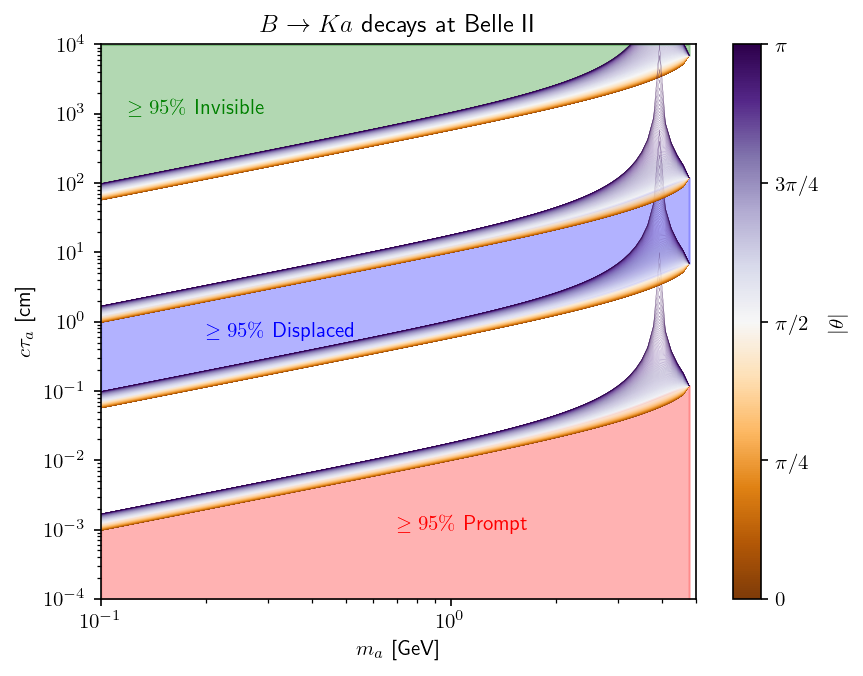

In [14]:
ma = np.logspace(-1,np.log10(mB-mK),100)
plt.figure(dpi=150)
for i, th in enumerate(np.linspace(0, 1, 256)):
    plt.loglog(ma, -rmin/gammabeta_alp(ma, th)/np.log(0.05), lw=0.1, c=colormaps['PuOr'](i))

for i, th in enumerate(np.linspace(0, 1, 256)):
    plt.loglog(ma, -rmin/gammabeta_alp(ma, th)/np.log(0.95), lw=0.1, c=colormaps['PuOr'](i))

for i, th in enumerate(np.linspace(0, 1, 256)):
    plt.loglog(ma, -rmax/gammabeta_alp(ma, th)/np.log(0.95), lw=0.1, c=colormaps['PuOr'](i))

for i, th in enumerate(np.linspace(0, 1, 256)):
    plt.loglog(ma, -rmax/gammabeta_alp(ma, th)/np.log(0.05), lw=0.1, c=colormaps['PuOr'](i))

plt.fill_between(ma, 1e-8, -rmin/gammabeta_alp(ma, 0.5)/np.log(0.05), color='r', alpha=0.3)
plt.annotate(r'$\geq 95\%$ Prompt', (0.7, 1e-3), color='r')
plt.fill_between(ma, -rmin/gammabeta_alp(ma, 0.5)/np.log(0.95), -rmax/gammabeta_alp(ma, 0.5)/np.log(0.05), color='b', alpha=0.3)
plt.annotate(r'$\geq 95\%$ Displaced', (0.2, 0.6), color='b')
plt.fill_between(ma, -rmax/gammabeta_alp(ma, th)/np.log(0.95), 1e4, color='g', alpha=0.3)
plt.annotate(r'$\geq 95\%$ Invisible', (0.12, 1e3), color='g')
plt.ylim(1e-4, 1e4)
plt.xlim(0.1, 5)
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$c\tau_a$ [cm]')
plt.title(r'$B\to K a$ decays at Belle II')
sm = plt.cm.ScalarMappable(cmap=colormaps['PuOr'])
ax = plt.gca()
cb = plt.colorbar(sm, ax=ax)
cb.set_ticks([0, 0.25, 0.5, 0.75, 1])
cb.set_ticklabels([r'$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$'])
cb.set_label(r'$|\theta|$')

In [76]:
prob_pr_th = [1-np.exp(-rmin/gammabeta_alp(ma, th)) for th in np.linspace(0, 1, 256)]

Text(0.5, 1.0, '$B\\to K a$ decays at Belle II, $c\\tau = 1\\,\\mathrm{cm}$')

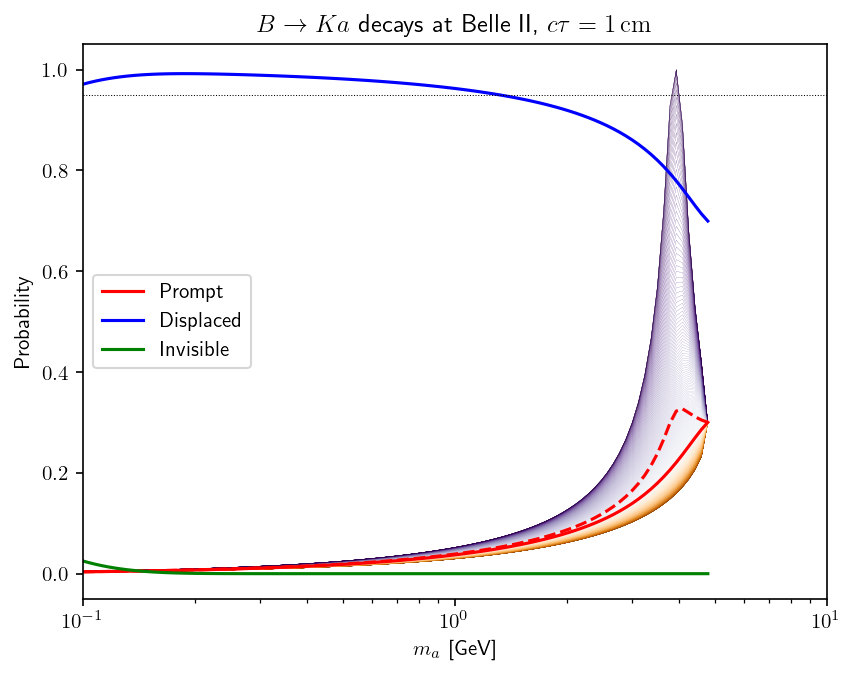

In [80]:
plt.figure(dpi=150)
for i, th in enumerate(np.linspace(0, 1, 256)):
    plt.semilogx(ma, 1-np.exp(-rmin/gammabeta_alp(ma, th)), lw=0.1, c=colormaps['PuOr'](i))
plt.semilogx(ma, 1-np.exp(-rmin/gammabeta_alp(ma)), c='r', label='Prompt')
plt.semilogx(ma, np.mean(prob_pr_th, axis=0), c='r', ls='--')
plt.semilogx(ma, np.exp(-rmin/gammabeta_alp(ma)) - np.exp(-rmax/gammabeta_alp(ma)), c='b', label='Displaced')
plt.semilogx(ma, np.exp(-rmax/gammabeta_alp(ma)), c='g', label='Invisible')
plt.axhline(0.95, c='k', lw=0.5, ls=':')
plt.legend()
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel('Probability')
plt.xlim(1e-1, 10)
plt.title(r'$B\to K a$ decays at Belle II, $c\tau = 1\,\mathrm{cm}$')

In [53]:
couplings = QED_DFSZ.get_couplings({beta:np.pi/4}, 1000).match_run(5.5, 'VA_below')

/home/jorge/.cache/pypoetry/virtualenvs/alpaca-dpejbsCX-py3.10/lib64/python3.10/site-packages/scipy/integrate/_ivp/base.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(fun(t, y), dtype=dtype)
/home/jorge/Documents/alpaca/alp-aca/alpaca/rge/classes.py:235: ComplexWarning: Casting complex values to real discards the imaginary part
  vals |= {'cg': float(array[53]), "cgamma": float(array[54])}


In [54]:
dw = np.vectorize(lambda ma: total_decay_width(ma, couplings, 1000, integrator='no_rge')['DW_tot'])

In [55]:
ctau = 1e-7*hbarc_GeVnm/dw(ma)

/home/jorge/.cache/pypoetry/virtualenvs/alpaca-dpejbsCX-py3.10/lib64/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/jorge/.cache/pypoetry/virtualenvs/alpaca-dpejbsCX-py3.10/lib64/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, '$B\\to K a$ decays at Belle II, QED-DFSZ with $\\tan\\beta=1$, $f_a=1\\,\\mathrm{TeV}$')

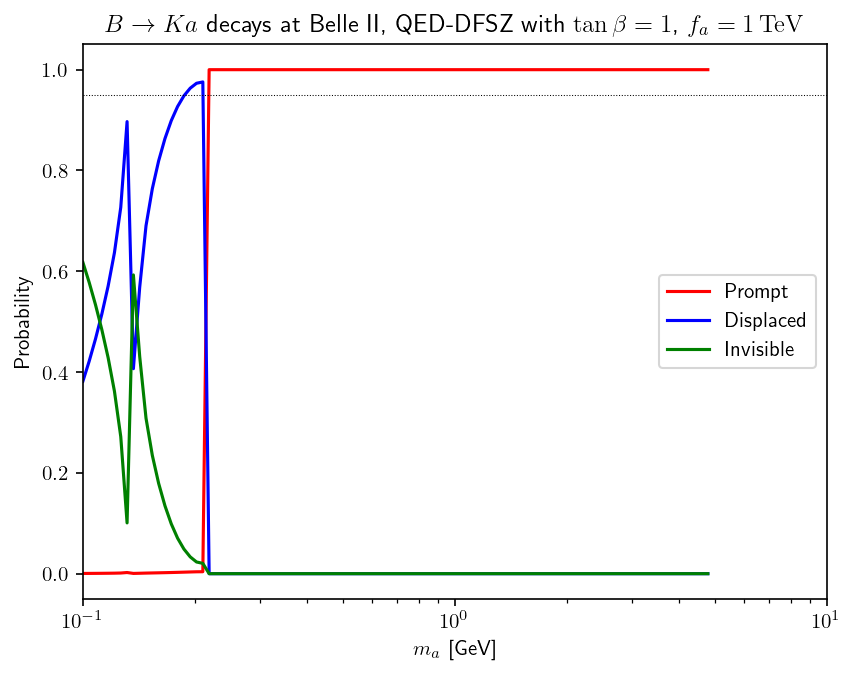

In [56]:
plt.figure(dpi=150)
plt.semilogx(ma, 1-np.exp(-rmin/ctau/gammabeta_alp(ma)), c='r', label='Prompt')
plt.semilogx(ma, np.exp(-rmin/ctau/gammabeta_alp(ma)) - np.exp(-rmax/ctau/gammabeta_alp(ma)), c='b', label='Displaced')
plt.semilogx(ma, np.exp(-rmax/ctau/gammabeta_alp(ma)), c='g', label='Invisible')
plt.axhline(0.95, c='k', lw=0.5, ls=':')
plt.legend()
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel('Probability')
plt.xlim(1e-1, 10)
plt.title(r'$B\to K a$ decays at Belle II, QED-DFSZ with $\tan\beta=1$, $f_a=1\,\mathrm{TeV}$')

In [57]:
coup = [QED_DFSZ.get_couplings({beta: np.pi/4}, fa).match_run(5.5, 'VA_below', 'leadinglog', matching_scale=80) for fa in np.logspace(2, 5, 50)]

In [58]:
x_ma, y_coup = np.meshgrid(ma, coup)

In [59]:
x_ma, y_fa = np.meshgrid(ma, np.logspace(2, 5, 50))

In [60]:
dw = np.vectorize(lambda ma, couplings, fa: total_decay_width(ma, couplings, fa, integrator='no_rge')['DW_tot'])

In [61]:
z_ctau = 1e-7*hbarc_GeVnm/dw(x_ma, y_coup, y_fa)

In [62]:
x_ma, y_fainv = np.meshgrid(ma, 1/np.logspace(2, 5, 50))

In [63]:
prob_prompt = 1-np.exp(-rmin/(z_ctau*gammabeta_alp(x_ma)))

In [64]:
prob_displ = np.exp(-rmin/(z_ctau*gammabeta_alp(x_ma))) - np.exp(-rmax/(z_ctau*gammabeta_alp(x_ma)))

In [65]:
prob_inv = np.exp(-rmax/(z_ctau*gammabeta_alp(x_ma)))

Text(0.5, 1.0, '$B\\to Ka$ at Belle II, QED-DFSZ with $\\tan\\beta=1$')

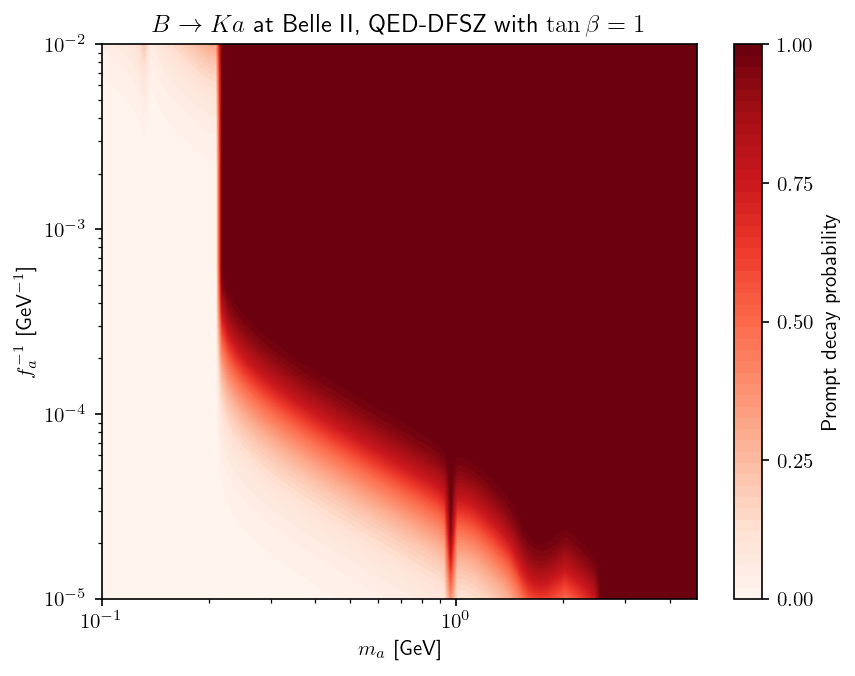

In [85]:
plt.figure(dpi=150)
plt.contourf(x_ma, y_fainv, prob_prompt, levels=np.linspace(0, 1, 50), cmap='Reds', vmin=0, vmax=1)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cbar = plt.colorbar()
cbar.set_ticks(np.linspace(0, 1, 5))
cbar.set_label('Prompt decay probability')
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$f_a^{-1}$ [GeV$^{-1}$]')
plt.title(r'$B\to Ka$ at Belle II, QED-DFSZ with $\tan\beta=1$')

/home/jorge/.cache/pypoetry/virtualenvs/alpaca-dpejbsCX-py3.10/lib64/python3.10/site-packages/matplotlib/contour.py:1515: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = z.max().astype(float)
/home/jorge/.cache/pypoetry/virtualenvs/alpaca-dpejbsCX-py3.10/lib64/python3.10/site-packages/matplotlib/contour.py:1516: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = z.min().astype(float)
/home/jorge/.cache/pypoetry/virtualenvs/alpaca-dpejbsCX-py3.10/lib64/python3.10/site-packages/numpy/ma/core.py:2820: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


Text(0.5, 1.0, '$B\\to Ka$ at Belle II, QED-DFSZ with $\\tan\\beta=1$')

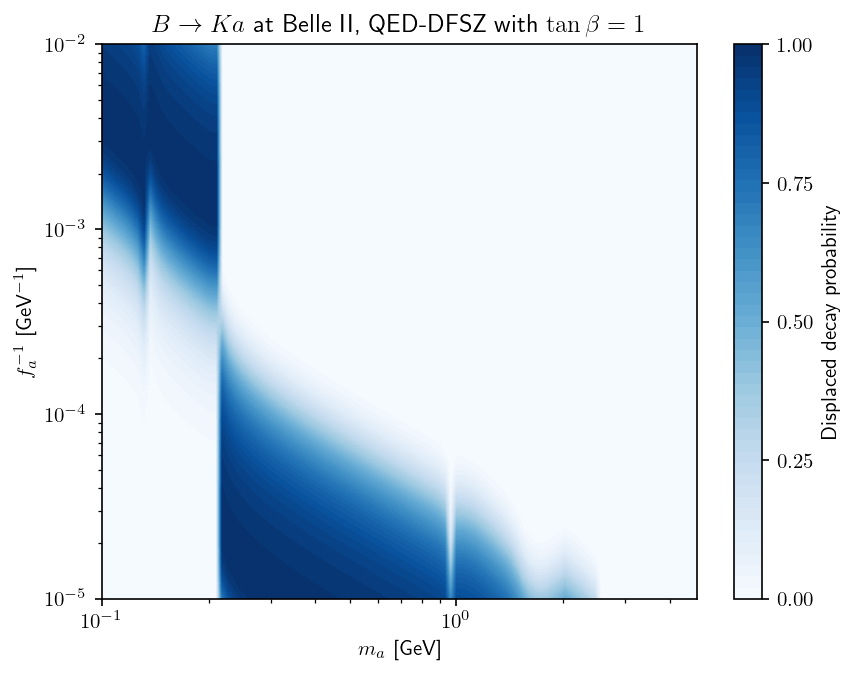

In [84]:
plt.figure(dpi=150)
plt.contourf(x_ma, y_fainv, prob_displ, levels=np.linspace(0, 1, 50), cmap='Blues', vmin=0, vmax=1)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cbar = plt.colorbar()
cbar.set_ticks(np.linspace(0, 1, 5))
cbar.set_label('Displaced decay probability')
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$f_a^{-1}$ [GeV$^{-1}$]')
plt.title(r'$B\to Ka$ at Belle II, QED-DFSZ with $\tan\beta=1$')

/home/jorge/.cache/pypoetry/virtualenvs/alpaca-dpejbsCX-py3.10/lib64/python3.10/site-packages/matplotlib/contour.py:1515: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = z.max().astype(float)
/home/jorge/.cache/pypoetry/virtualenvs/alpaca-dpejbsCX-py3.10/lib64/python3.10/site-packages/matplotlib/contour.py:1516: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = z.min().astype(float)
/home/jorge/.cache/pypoetry/virtualenvs/alpaca-dpejbsCX-py3.10/lib64/python3.10/site-packages/numpy/ma/core.py:2820: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


Text(0.5, 1.0, '$B\\to Ka$ at Belle II, QED-DFSZ with $\\tan\\beta=1$')

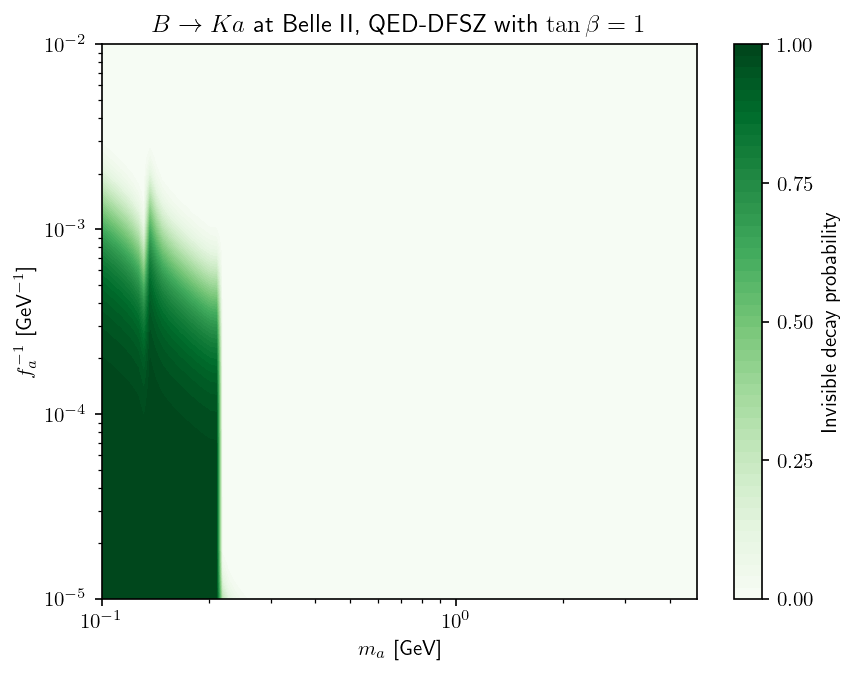

In [68]:
plt.figure(dpi=150)
plt.contourf(x_ma, y_fainv, prob_inv, levels=np.linspace(0, 1, 50), cmap='Greens', vmin=0, vmax=1)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cbar = plt.colorbar()
cbar.set_ticks(np.linspace(0, 1, 5))
cbar.set_label('Invisible decay probability')
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$f_a^{-1}$ [GeV$^{-1}$]')
plt.title(r'$B\to Ka$ at Belle II, QED-DFSZ with $\tan\beta=1$')

/home/jorge/.cache/pypoetry/virtualenvs/alpaca-dpejbsCX-py3.10/lib64/python3.10/site-packages/matplotlib/contour.py:1515: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = z.max().astype(float)
/home/jorge/.cache/pypoetry/virtualenvs/alpaca-dpejbsCX-py3.10/lib64/python3.10/site-packages/matplotlib/contour.py:1516: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = z.min().astype(float)
/home/jorge/.cache/pypoetry/virtualenvs/alpaca-dpejbsCX-py3.10/lib64/python3.10/site-packages/numpy/ma/core.py:2820: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


Text(0.5, 1.0, '$B\\to Ka$ at Belle II, QED-DFSZ with $\\tan\\beta=1$')

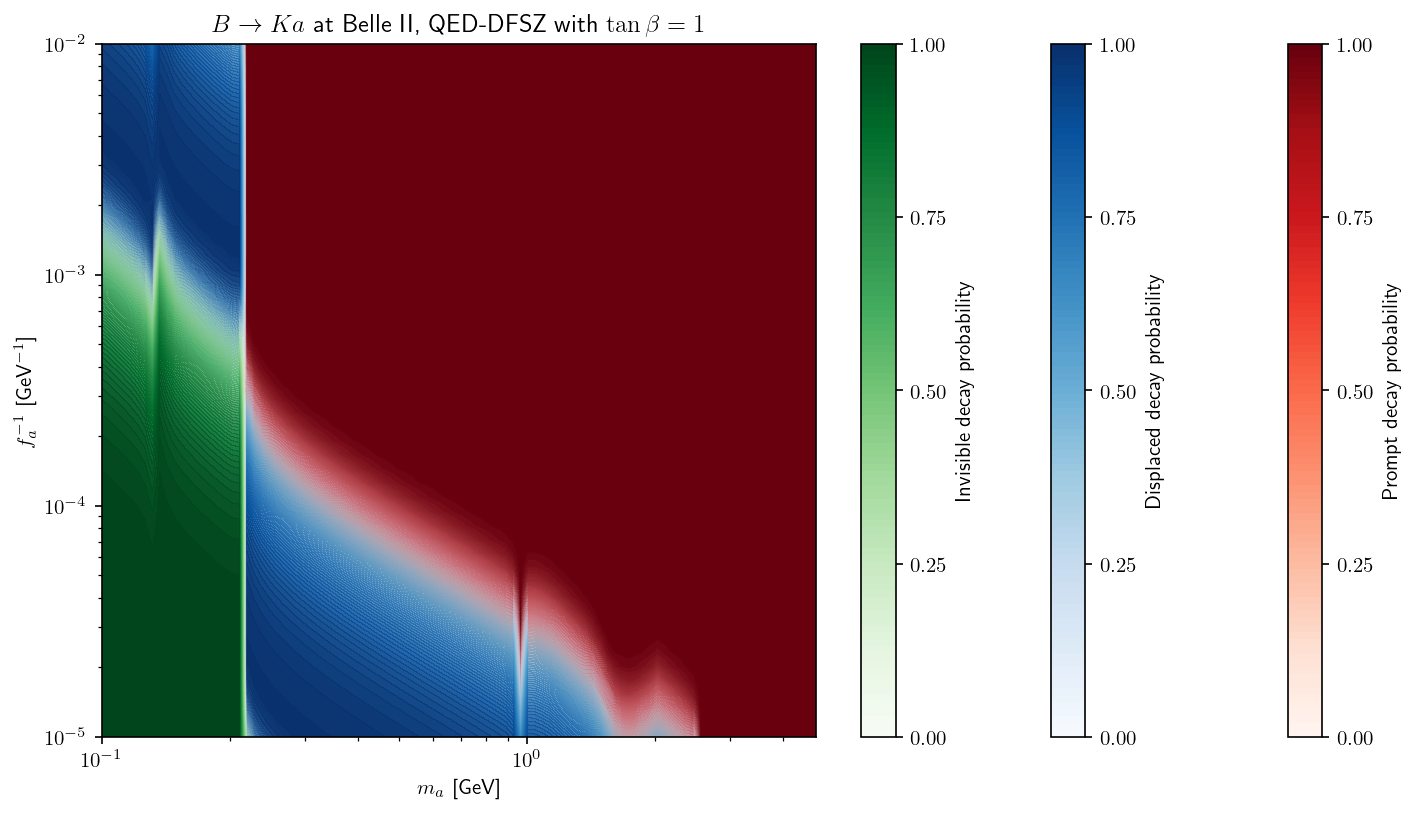

In [69]:
plt.figure(figsize=(12,6), dpi=150)
p1=plt.contourf(x_ma, y_fainv, prob_prompt, levels=np.linspace(0, 1, 100), cmap='Reds', vmin=0, vmax=1, alpha=np.linspace(0, 1, 99))
p2=plt.contourf(x_ma, y_fainv, prob_displ, levels=np.linspace(0, 1, 100), cmap='Blues', vmin=0, vmax=1, alpha=np.linspace(0, 1, 99))
p3=plt.contourf(x_ma, y_fainv, prob_inv, levels=np.linspace(0, 1, 100), cmap='Greens', vmin=0, vmax=1, alpha=np.linspace(0, 1, 99))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cbar1 = plt.colorbar(p1)
cbar1.set_ticks(np.linspace(0, 1, 5))
cbar1.set_label('Prompt decay probability')
cbar2 = plt.colorbar(p2)
cbar2.set_ticks(np.linspace(0, 1, 5))
cbar2.set_label('Displaced decay probability')
cbar3 = plt.colorbar(p3)
cbar3.set_ticks(np.linspace(0, 1, 5))
cbar3.set_label('Invisible decay probability')
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$f_a^{-1}$ [GeV$^{-1}$]')
plt.title(r'$B\to Ka$ at Belle II, QED-DFSZ with $\tan\beta=1$')